**CARIFet (Cabinet of the Republic of Indonesia Fetcher)**

Import required libs

In [1]:
import pandas as pd # Dataframe
import matplotlib.pyplot as plt # Plotting
from datetime import date # Timestamp

import wikipediaapi as wp # Page Extractor
import wikipedia # Page Search

Read Wikitable as Pandas' Dataframes

In [2]:
# Data source
dfs = pd.read_html("https://id.wikipedia.org/wiki/Kabinet_Indonesia_Maju", attrs={"class": "wikitable"}, header=0)

# Menteri
df1 = dfs[1]
df1.drop(df1[df1['No.'].str.isnumeric() == False].index, inplace=True) # drop row with colspan
df1.drop(["Pejabat","No."], axis=1, inplace=True)
df1.rename(columns={"Pejabat.1": "Pejabat"}, inplace=True, errors="raise")

# Pejabat Setingkat Menteri
df3 = dfs[3]
df3.drop(["Pejabat","No."], axis=1, inplace=True)
df3.drop(df3[df3["Selesai menjabat"] != "Petahana"].index, inplace=True) # drop row with colspan
df3.rename(columns={"Pejabat.1": "Pejabat"}, inplace=True, errors="raise")

# Merge table
df = df1.append(df3, sort=False)

# Reset index
df.reset_index(drop=True, inplace=True)

Show Current Dataframe

In [3]:
df

,Jabatan,Pejabat,Mulai menjabat,Selesai menjabat,Wakil dari Partai
0,"Menteri Koordinator Bidang Politik, Hukum, dan...",Mohammad Mahfud MD,23 Oktober 2019,Petahana,Non Partai
1,Menteri Koordinator Bidang Perekonomian,Airlangga Hartarto,23 Oktober 2019,Petahana,Golkar
2,Menteri Koordinator Bidang Kemaritiman dan Inv...,Luhut Binsar Panjaitan,23 Oktober 2019,Petahana,Golkar
3,Menteri Koordinator Bidang Pembangunan Manusia...,Muhadjir Effendy,23 Oktober 2019,Petahana,Non Partai
4,Menteri Sekretaris Negara,Pratikno,23 Oktober 2019,Petahana,Non Partai
5,Menteri Dalam Negeri,Tito Karnavian,23 Oktober 2019,Petahana,Non Partai
6,Menteri Luar Negeri,Retno Lestari Priansari Marsudi,23 Oktober 2019,Petahana,Non Partai
7,Menteri Pertahanan,Prabowo Subianto,23 Oktober 2019,Petahana,Gerindra
8,Menteri Hukum dan Hak Asasi Manusia,Yasonna Laoly,23 Oktober 2019,Petahana,PDI-P
9,Menteri Keuangan,Sri Mulyani Indrawati,23 Oktober 2019,Petahana,Non Partai


Proporsi partai

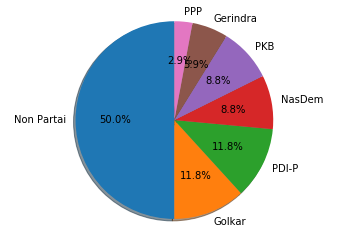

In [4]:
labels = df['Wakil dari Partai'].value_counts().keys().tolist()
counts = df['Wakil dari Partai'].value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()